# Text Mining

## Problem Statement:
    
1) Extract reviews of any product from ecommerce website like amazon.

2) Perform emotion mining.

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
import spacy
import re

from nltk import tokenize
from autoscraper import AutoScraper

from wordcloud import WordCloud, STOPWORDS

## Downloading review from Amazon.in for the laptop "Lenovo IdeaPad Slim 5"

In [38]:
amazon_url="https://www.amazon.in/Lenovo-IdeaPad-Fingerprint-Graphite-82FGO1H9IN/product-reviews/B09M423NVT/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"

wanted_list=["Awesome specs. Boots up fast. Fingerprint scanner is also fast. We noticed a minor dead pixel and amazon replaced it. Warranty is not an issue as some people have mentioned. After receiving laptop, we got to inform lenovo and they would update Warranty based on the product received date."]

In [39]:
scraper=AutoScraper()
data=scraper.build(amazon_url,wanted_list)
print(data)

['Awesome specs. Boots up fast. Fingerprint scanner is also fast. We noticed a minor dead pixel and amazon replaced it. Warranty is not an issue as some people have mentioned. After receiving laptop, we got to inform lenovo and they would update Warranty based on the product received date.', 'The warranty of this product is supposed to be for one year but it is available only for 10 months and it has already been activated before 2 months of buying the product.', "This is the review after 1 month of usage.Abstract: I really liked the product. It's having really great specs. However, it's not comparable to the built quality of HP or Dell. But as I care my laptop so much, no issues related to it happened for me (I heard there are few laps with hinge issues).My uses: Web surfing ( ofcourse, will open many tabs), MS Office, Basic - Moderate Photoshop, Basic Gaming, Uses Virtual Machine, Android Studio.PROS:Haven't experienced any lags till now. ( Even when I opened many Edge tabs and Andro

In [40]:
data = [x.strip() for x in data] 
data = [x for x in data if x] 
data[0:10]

['Awesome specs. Boots up fast. Fingerprint scanner is also fast. We noticed a minor dead pixel and amazon replaced it. Warranty is not an issue as some people have mentioned. After receiving laptop, we got to inform lenovo and they would update Warranty based on the product received date.',
 'The warranty of this product is supposed to be for one year but it is available only for 10 months and it has already been activated before 2 months of buying the product.',
 "This is the review after 1 month of usage.Abstract: I really liked the product. It's having really great specs. However, it's not comparable to the built quality of HP or Dell. But as I care my laptop so much, no issues related to it happened for me (I heard there are few laps with hinge issues).My uses: Web surfing ( ofcourse, will open many tabs), MS Office, Basic - Moderate Photoshop, Basic Gaming, Uses Virtual Machine, Android Studio.PROS:Haven't experienced any lags till now. ( Even when I opened many Edge tabs and And

In [41]:
comment = tokenize.sent_tokenize(" ".join(data))
comment

['Awesome specs.',
 'Boots up fast.',
 'Fingerprint scanner is also fast.',
 'We noticed a minor dead pixel and amazon replaced it.',
 'Warranty is not an issue as some people have mentioned.',
 'After receiving laptop, we got to inform lenovo and they would update Warranty based on the product received date.',
 'The warranty of this product is supposed to be for one year but it is available only for 10 months and it has already been activated before 2 months of buying the product.',
 'This is the review after 1 month of usage.Abstract: I really liked the product.',
 "It's having really great specs.",
 "However, it's not comparable to the built quality of HP or Dell.",
 "But as I care my laptop so much, no issues related to it happened for me (I heard there are few laps with hinge issues).My uses: Web surfing ( ofcourse, will open many tabs), MS Office, Basic - Moderate Photoshop, Basic Gaming, Uses Virtual Machine, Android Studio.PROS:Haven't experienced any lags till now.",
 "( Even 

In [42]:
reviews = pd.DataFrame(sentences, columns=["comment"])
reviews

,comment
0,Awesome specs.
1,Boots up fast.
2,Fingerprint scanner is also fast.
3,We noticed a minor dead pixel and amazon repla...
4,Warranty is not an issue as some people have m...
5,"After receiving laptop, we got to inform lenov..."
6,The warranty of this product is supposed to be...
7,This is the review after 1 month of usage.Abst...
8,It's having really great specs.
9,"However, it's not comparable to the built qual..."


## EDA

In [43]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   comment  38 non-null     object
dtypes: object(1)
memory usage: 432.0+ bytes


In [44]:
reviews.isna().sum()

comment    0
dtype: int64

## Text Preprocessing

In [35]:
reviews=[comment.strip() for comment in reviews.comment]
reviews=[comment for comment in reviews if comment]
reviews[0:10]

['Awesome specs.',
 'Boots up fast.',
 'Fingerprint scanner is also fast.',
 'We noticed a minor dead pixel and amazon replaced it.',
 'Warranty is not an issue as some people have mentioned.',
 'After receiving laptop, we got to inform lenovo and they would update Warranty based on the product received date.',
 'The warranty of this product is supposed to be for one year but it is available only for 10 months and it has already been activated before 2 months of buying the product.',
 'This is the review after 1 month of usage.Abstract: I really liked the product.',
 "It's having really great specs.",
 "However, it's not comparable to the built quality of HP or Dell."]

In [36]:
reviews_text=' '.join(reviews)
reviews_text

"Awesome specs. Boots up fast. Fingerprint scanner is also fast. We noticed a minor dead pixel and amazon replaced it. Warranty is not an issue as some people have mentioned. After receiving laptop, we got to inform lenovo and they would update Warranty based on the product received date. The warranty of this product is supposed to be for one year but it is available only for 10 months and it has already been activated before 2 months of buying the product. This is the review after 1 month of usage.Abstract: I really liked the product. It's having really great specs. However, it's not comparable to the built quality of HP or Dell. But as I care my laptop so much, no issues related to it happened for me (I heard there are few laps with hinge issues).My uses: Web surfing ( ofcourse, will open many tabs), MS Office, Basic - Moderate Photoshop, Basic Gaming, Uses Virtual Machine, Android Studio.PROS:Haven't experienced any lags till now. ( Even when I opened many Edge tabs and Android Stud

In [45]:
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'Awesome specs Boots up fast Fingerprint scanner is also fast We noticed a minor dead pixel and amazon replaced it Warranty is not an issue as some people have mentioned After receiving laptop we got to inform lenovo and they would update Warranty based on the product received date The warranty of this product is supposed to be for one year but it is available only for 10 months and it has already been activated before 2 months of buying the product This is the review after 1 month of usageAbstract I really liked the product Its having really great specs However its not comparable to the built quality of HP or Dell But as I care my laptop so much no issues related to it happened for me I heard there are few laps with hinge issuesMy uses Web surfing  ofcourse will open many tabs MS Office Basic  Moderate Photoshop Basic Gaming Uses Virtual Machine Android StudioPROSHavent experienced any lags till now  Even when I opened many Edge tabs and Android Studio Lap handled it super smoothlyQui

In [46]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BASHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\BASHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [47]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:50])

['Awesome', 'specs', 'Boots', 'up', 'fast', 'Fingerprint', 'scanner', 'is', 'also', 'fast', 'We', 'noticed', 'a', 'minor', 'dead', 'pixel', 'and', 'amazon', 'replaced', 'it', 'Warranty', 'is', 'not', 'an', 'issue', 'as', 'some', 'people', 'have', 'mentioned', 'After', 'receiving', 'laptop', 'we', 'got', 'to', 'inform', 'lenovo', 'and', 'they', 'would', 'update', 'Warranty', 'based', 'on', 'the', 'product', 'received', 'date', 'The']


In [48]:
len(text_tokens)

687

In [49]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['Awesome', 'specs', 'Boots', 'fast', 'Fingerprint', 'scanner', 'also', 'fast', 'We', 'noticed', 'minor', 'dead', 'pixel', 'amazon', 'replaced', 'Warranty', 'issue', 'people', 'mentioned', 'After', 'receiving', 'laptop', 'got', 'inform', 'lenovo', 'would', 'update', 'Warranty', 'based', 'product', 'received', 'date', 'warranty', 'product', 'supposed', 'one', 'year', 'available', '10', 'months', 'already', 'activated', '2', 'months', 'buying', 'product', 'This', 'review', '1', 'month', 'usageAbstract', 'really', 'liked', 'product', 'Its', 'really', 'great', 'specs', 'However', 'comparable', 'built', 'quality', 'HP', 'Dell', 'But', 'care', 'laptop', 'much', 'issues', 'related', 'happened', 'heard', 'laps', 'hinge', 'issuesMy', 'uses', 'Web', 'surfing', 'ofcourse', 'open', 'many', 'tabs', 'MS', 'Office', 'Basic', 'Moderate', 'Photoshop', 'Basic', 'Gaming', 'Uses', 'Virtual', 'Machine', 'Android', 'StudioPROSHavent', 'experienced', 'lags', 'till', 'Even', 'opened', 'many', 'Edge', 'tabs', 

In [50]:
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words)

['awesome', 'specs', 'boots', 'fast', 'fingerprint', 'scanner', 'also', 'fast', 'we', 'noticed', 'minor', 'dead', 'pixel', 'amazon', 'replaced', 'warranty', 'issue', 'people', 'mentioned', 'after', 'receiving', 'laptop', 'got', 'inform', 'lenovo', 'would', 'update', 'warranty', 'based', 'product', 'received', 'date', 'warranty', 'product', 'supposed', 'one', 'year', 'available', '10', 'months', 'already', 'activated', '2', 'months', 'buying', 'product', 'this', 'review', '1', 'month', 'usageabstract', 'really', 'liked', 'product', 'its', 'really', 'great', 'specs', 'however', 'comparable', 'built', 'quality', 'hp', 'dell', 'but', 'care', 'laptop', 'much', 'issues', 'related', 'happened', 'heard', 'laps', 'hinge', 'issuesmy', 'uses', 'web', 'surfing', 'ofcourse', 'open', 'many', 'tabs', 'ms', 'office', 'basic', 'moderate', 'photoshop', 'basic', 'gaming', 'uses', 'virtual', 'machine', 'android', 'studioproshavent', 'experienced', 'lags', 'till', 'even', 'opened', 'many', 'edge', 'tabs', 

In [51]:
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc)

awesome specs boots fast fingerprint scanner also fast we noticed minor dead pixel amazon replaced warranty issue people mentioned after receiving laptop got inform lenovo would update warranty based product received date warranty product supposed one year available 10 months already activated 2 months buying product this review 1 month usageabstract really liked product its really great specs however comparable built quality hp dell but care laptop much issues related happened heard laps hinge issuesmy uses web surfing ofcourse open many tabs ms office basic moderate photoshop basic gaming uses virtual machine android studioproshavent experienced lags till even opened many edge tabs android studio lap handled super smoothlyquick bootingsnappy fingerprint reader16gb ram enough daily activities web surfing email movies moderate photoshop basic gaming etcsuperfast charging great battery backup can charge using usb type c dont lap charger youloud speakerslightweightscreen brightness great

In [52]:
lemmas=[token.lemma_ for token in doc]
print(lemmas)

['awesome', 'spec', 'boot', 'fast', 'fingerprint', 'scanner', 'also', 'fast', 'we', 'notice', 'minor', 'dead', 'pixel', 'amazon', 'replace', 'warranty', 'issue', 'people', 'mention', 'after', 'receive', 'laptop', 'get', 'inform', 'lenovo', 'would', 'update', 'warranty', 'base', 'product', 'receive', 'date', 'warranty', 'product', 'suppose', 'one', 'year', 'available', '10', 'month', 'already', 'activate', '2', 'month', 'buy', 'product', 'this', 'review', '1', 'month', 'usageabstract', 'really', 'like', 'product', 'its', 'really', 'great', 'spec', 'however', 'comparable', 'build', 'quality', 'hp', 'dell', 'but', 'care', 'laptop', 'much', 'issue', 'relate', 'happen', 'hear', 'lap', 'hinge', 'issuesmy', 'use', 'web', 'surf', 'ofcourse', 'open', 'many', 'tab', 'ms', 'office', 'basic', 'moderate', 'photoshop', 'basic', 'gaming', 'use', 'virtual', 'machine', 'android', 'studioproshavent', 'experience', 'lag', 'till', 'even', 'open', 'many', 'edge', 'tab', 'android', 'studio', 'lap', 'handle'

In [53]:
clean_reviews=' '.join(lemmas)
clean_reviews

'awesome spec boot fast fingerprint scanner also fast we notice minor dead pixel amazon replace warranty issue people mention after receive laptop get inform lenovo would update warranty base product receive date warranty product suppose one year available 10 month already activate 2 month buy product this review 1 month usageabstract really like product its really great spec however comparable build quality hp dell but care laptop much issue relate happen hear lap hinge issuesmy use web surf ofcourse open many tab ms office basic moderate photoshop basic gaming use virtual machine android studioproshavent experience lag till even open many edge tab android studio lap handle super smoothlyquick bootingsnappy fingerprint reader16 gb ram enough daily activity web surf email movie moderate photoshop basic gaming etcsuperfast charge great battery backup can charge use usb type c do not lap charger youloud speakerslightweightscreen brightness great inside roomlike 2 level keyboard backlit b

## Feature Extaction Using CountVectorizer

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
reviewscv=cv.fit_transform(lemmas)

In [63]:
print(cv.vocabulary_)

{'awesome': 22, 'spec': 223, 'boot': 33, 'fast': 85, 'fingerprint': 88, 'scanner': 207, 'also': 11, 'we': 254, 'notice': 173, 'minor': 159, 'dead': 63, 'pixel': 185, 'amazon': 13, 'replace': 201, 'warranty': 252, 'issue': 124, 'people': 183, 'mention': 157, 'after': 7, 'receive': 199, 'laptop': 134, 'get': 100, 'inform': 122, 'lenovo': 138, 'would': 263, 'update': 246, 'base': 26, 'product': 189, 'date': 61, 'suppose': 233, 'one': 177, 'year': 265, 'available': 20, '10': 0, 'month': 163, 'already': 10, 'activate': 5, 'buy': 41, 'this': 240, 'review': 204, 'usageabstract': 247, 'really': 198, 'like': 142, 'its': 129, 'great': 105, 'however': 120, 'comparable': 51, 'build': 39, 'quality': 192, 'hp': 121, 'dell': 67, 'but': 40, 'care': 44, 'much': 167, 'relate': 200, 'happen': 109, 'hear': 113, 'lap': 133, 'hinge': 117, 'issuesmy': 126, 'use': 249, 'web': 255, 'surf': 234, 'ofcourse': 174, 'open': 179, 'many': 152, 'tab': 237, 'ms': 166, 'office': 175, 'basic': 27, 'moderate': 161, 'photo

In [64]:
print(cv.get_feature_names()[150:300])

['machine', 'make', 'many', 'material', 'maximum', 'mean', 'medium', 'mention', 'might', 'minor', 'missesnot', 'moderate', 'monitor', 'month', 'mouse', 'movie', 'ms', 'much', 'need', 'niggle', 'no', 'noise', 'not', 'notice', 'ofcourse', 'office', 'okay', 'one', 'only', 'open', 'panel', 'par', 'pass', 'people', 'photoshop', 'pixel', 'placesowell', 'press', 'price', 'product', 'promise', 'put', 'quality', 'quick', 'raise', 'ram', 'range', 'reader16', 'really', 'receive', 'relate', 'replace', 'resolution', 'resolve', 'review', 'roomlike', 'say', 'scanner', 'screen', 'second', 'secondary', 'shake', 'show', 'slightly', 'smoothlyquick', 'smoothlywhen', 'so', 'software', 'soundnumberpad', 'soundvery', 'space', 'speakers3hard', 'speakerslightweightscreen', 'spec', 'speed', 'star', 'start', 'studio', 'studioproshavent', 'study', 'sub', 'suggest', 'super', 'suppose', 'surf', 'sustain', 'system', 'tab', 'take', 'think', 'this', 'till', 'touchpad', 'try', 'type', 'typingyou', 'update', 'usageabstr

In [65]:
print(reviewscv.toarray()[150:300])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [66]:
print(reviewscv.toarray().shape)

(431, 269)


## Generate Word Cloud

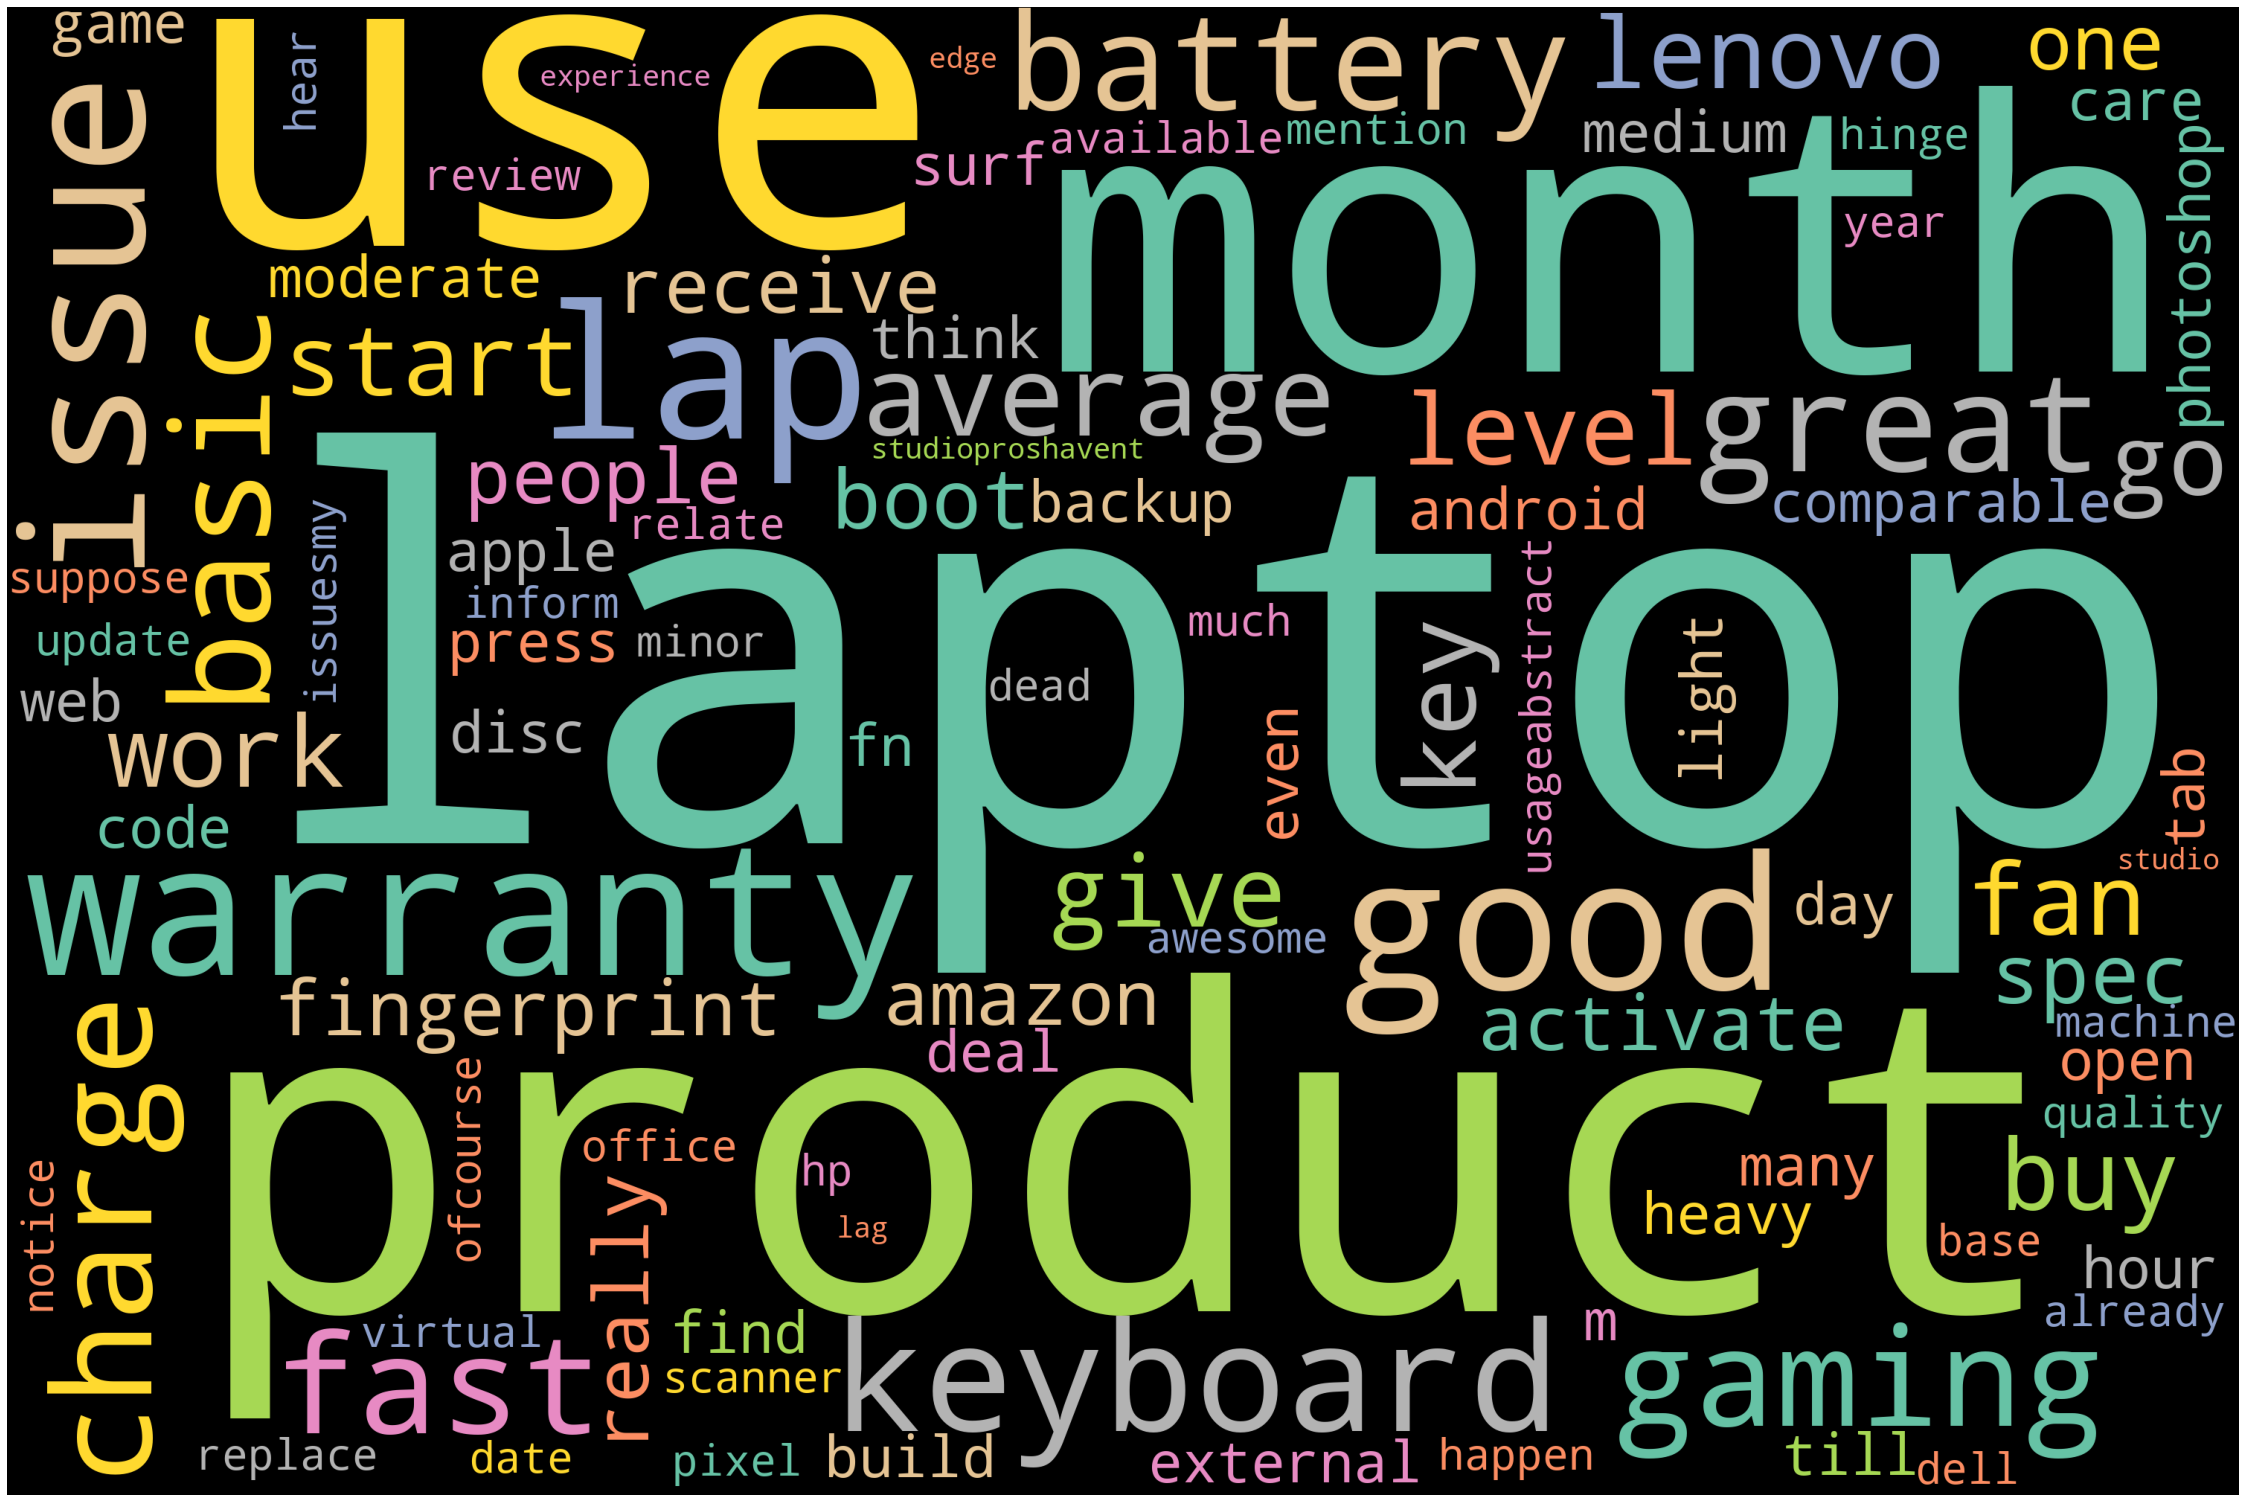

In [70]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(wordcloud)

## Named Entity Recognition (NER)

In [71]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_reviews
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [72]:
for token in doc_block[100:200]:
    print(token,token.pos_)

edge NOUN
tab PROPN
android PROPN
studio NOUN
lap NOUN
handle VERB
super PROPN
smoothlyquick PROPN
bootingsnappy PROPN
fingerprint PROPN
reader16 PROPN
gb PROPN
ram VERB
enough ADJ
daily ADJ
activity NOUN
web NOUN
surf NOUN
email NOUN
movie NOUN
moderate ADJ
photoshop PROPN
basic ADJ
gaming NOUN
etcsuperfast NOUN
charge NOUN
great ADJ
battery NOUN
backup NOUN
can AUX
charge VERB
use VERB
usb NOUN
type NOUN
c AUX
do AUX
not PART
lap VERB
charger NOUN
youloud NOUN
speakerslightweightscreen PROPN
brightness NOUN
great ADJ
inside ADP
roomlike ADJ
2 NUM
level NOUN
keyboard NOUN
backlit NOUN
brightnessno PROPN
loud ADJ
fan PROPN
soundnumberpad PROPN
make VERB
easy ADJ
typingyou ADP
lockunlock NOUN
fn NOUN
key NOUN
no DET
need NOUN
press NOUN
fn PROPN
key PROPN
alwaysconsthe PROPN
keyboard PROPN
touchpad NOUN
delicate ADV
so ADV
suggest VERB
buy VERB
external ADJ
keyboard NOUN
mouse NOUN
especially ADV
gamer NOUN
when SCONJ
press VERB
j PROPN
key ADJ
keyboard PROPN
panel NOUN
slightly ADV
ben

In [73]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['try', 'asphalt', 'valorant', 'lap', 'lap', 'get', 'bit', 'keyboard', 'area', 'game', 'work', 'smoothlywhen', 'fan', 'speed', 'lap', 'monitor', 'start', 'shake', 'lightlyi', 'claim', 'game', 'pass', 'con', 'issue', 'people', 'think', 'buy', 'price', 'range', 'm', 'product', 'product', 'missesnot', 'deal', 'breaker', 'looking', 'find', 'displaynot', 'say', 'gaming', 'it2', 'soundvery', 'sub', 'use', 'speakers3hard', 'disc', 'space', 'low', 'use', 'cloud', 'work', 'code', 'software', 'display', 'put', 'placesowell', 'disc', 'guess4', 'weight', 'material', 'feel', 'deal', 'break', 'flimsybut', 'get', 'aircaseso', 'level', 'take', 'look', 'laptop', 'level', 'gaming', 'code', 'go', 'guess', 'medium', 'load', 'laptop', 'start', 'day', 'start', 'use', 'laptop', 'work', 'battery', 'backup', 'show', 'maximum', 'u', 'use', 'drain', 'use', 'laptop', 'month', 'find', 'have', 'study', 'build', 'boot', 'screen']


In [74]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x: x[1],reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10]

,word,count
0,laptop,11
1,product,10
2,use,9
3,month,7
4,warranty,6
5,lap,6
6,issue,5
7,gaming,4
8,charge,4
9,battery,4


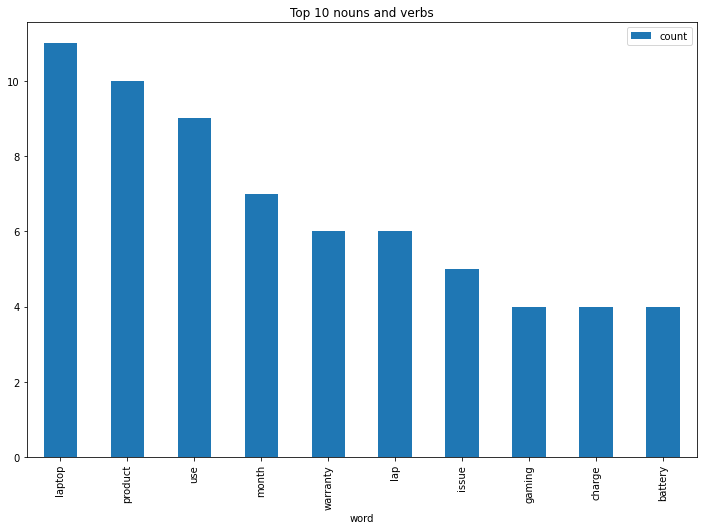

In [75]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs');

# Sentiment Analysis using Affin

In [76]:
afinn = pd.read_csv("C:/Users/BASHAR/OneDrive/Documents/Latest Data Science Material/Day-34/Afinn.csv", encoding="latin-1")
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [77]:
from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

In [78]:
affin_score = afinn.set_index("word")["value"].to_dict()
take(20, affin_score.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [79]:
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affin_score

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [80]:
reviews["sentiment_score"] = reviews["comment"].apply(calculate_sentiment)

In [81]:
reviews["Word_count"] = reviews["comment"].str.split().apply(len)
reviews.head()

,comment,sentiment_score,Word_count
0,Awesome specs.,4,2
1,Boots up fast.,0,3
2,Fingerprint scanner is also fast.,0,5
3,We noticed a minor dead pixel and amazon repla...,-3,10
4,Warranty is not an issue as some people have m...,0,10


In [83]:
reviews.sort_values(by="sentiment_score")

,comment,sentiment_score,Word_count
3,We noticed a minor dead pixel and amazon repla...,-3,10
19,Average product but has the below misses...not...,-2,20
22,Anyway the display will put you off in the fir...,-1,20
35,"Laptop delivered yesterday, but warranty left ...",-1,27
12,(No need to press Fn key always).CONS:The keyb...,-1,30
16,But it's okay for me.,0,5
33,Only because battery is not comparable to an A...,0,10
28,Have been using this laptop for a month.,0,8
27,Battery backup shows 4hrs maximum and if u con...,0,15
26,"Its not even the second day, to start using th...",0,17


In [85]:
reviews[reviews['sentiment_score']<=0].head()

,comment,sentiment_score,Word_count
1,Boots up fast.,0,3
2,Fingerprint scanner is also fast.,0,5
3,We noticed a minor dead pixel and amazon repla...,-3,10
4,Warranty is not an issue as some people have m...,0,10
5,"After receiving laptop, we got to inform lenov...",0,19


In [87]:
reviews[reviews['sentiment_score']>0].head()

,comment,sentiment_score,Word_count
0,Awesome specs.,4,2
7,This is the review after 1 month of usage.Abst...,2,14
8,It's having really great specs.,3,5
11,( Even when I opened many Edge tabs and Androi...,12,84
15,But the game works smoothly.When the fan is on...,4,37


<AxesSubplot:xlabel='index', ylabel='sentiment_score'>

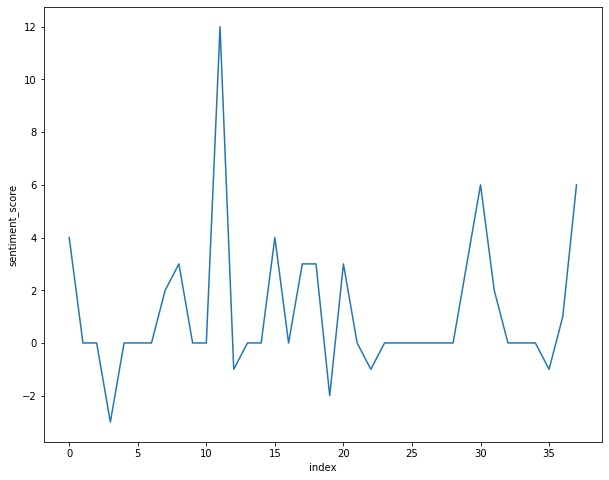

In [88]:
reviews['index']=range(0,len(sent_df))
plt.figure(figsize=(10, 8))
sns.lineplot(y='sentiment_score',x='index',data=reviews)

<AxesSubplot:xlabel='sentiment_score', ylabel='Density'>

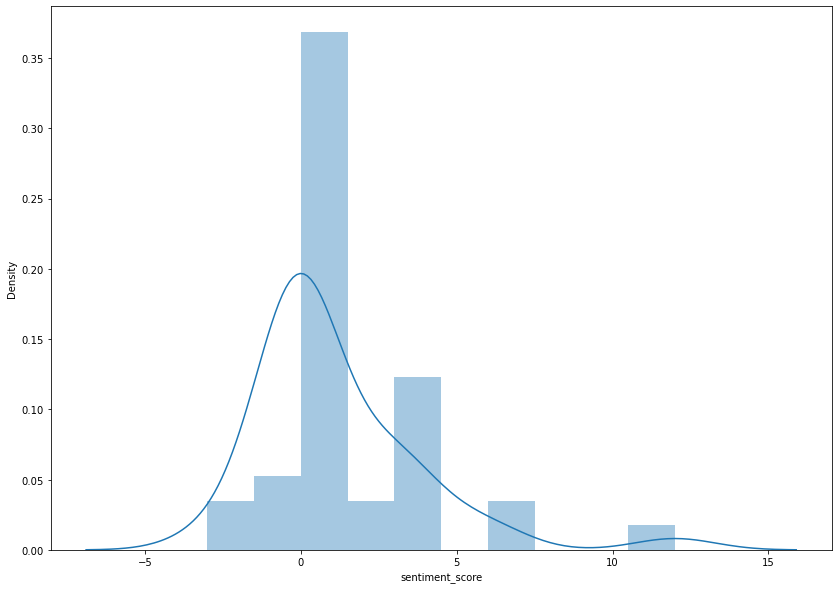

In [89]:
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(14,10))
sns.distplot(reviews['sentiment_score'])

## Conclusion:

From the above distplot we can conclude that the number of reviews with positive sentiment score are more than the number of reviews with negative sentiment score.